<a href="https://colab.research.google.com/github/Shubhamprasad1995/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **Importing necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# **Mounting Drive & Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv' , encoding = 'latin')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#For sentiment analysis we only want tweet and sentiment Features
df=df[['OriginalTweet','Sentiment']]

In [ ]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#checking Unique values
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
#checking Shape of the dataset
df.shape

(41157, 2)

In [ ]:
#check duplicate entries
len(df[df.duplicated()])

0

# **Text Processing & Feature Engineering**

In [ ]:
df["OriginalTweet"] = df["OriginalTweet"].str.lower()
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [ ]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [ ]:
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)

In [ ]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [ ]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head() 

,OriginalTweet,Sentiment,clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [ ]:
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

# **Removing Stop Words :**

In [ ]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))
df.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

# **Stemming**

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df['stemmed'] = df['clean_tweets'].apply(lambda x: stemming(x))

Observation :
# Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

# **Lemmatizing**

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [ ]:
df.head()

,OriginalTweet,Sentiment,clean_tweets,stemmed,lemmed
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,"[menyrbie, philgahan, chrisitv]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[advice, talk, neighbour, family, exchange, ph..."
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[coronavirus, australia, woolworth, give, elde..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,"[food, stock, one, empty, please, dont, panic,..."
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,"[ready, go, supermarket, covid, outbreak, im, ..."


Observation :
Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.

# **EDA**

Tweet Count For Each Sentiment

In [ ]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

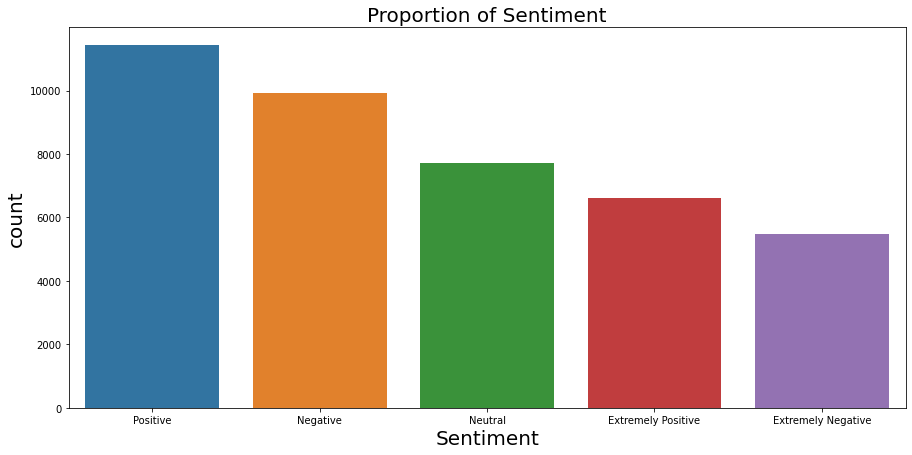

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

Observation :
Number of "Positive" sentiments are higher than all other sentiments

In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


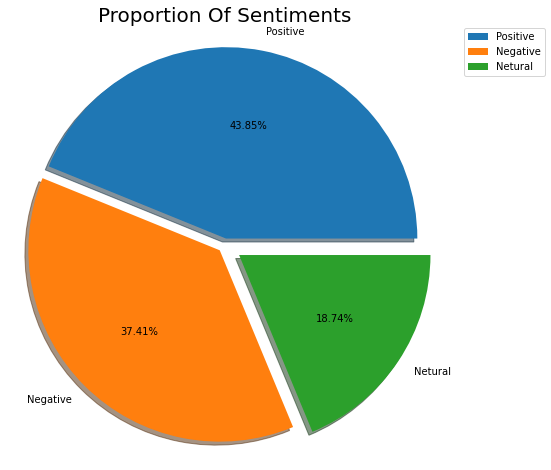

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Obeservation :
We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.

In [ ]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [ ]:
from collections import Counter 
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'covid',",18286
1,"'coronavirus',",12991
2,"'prices',",7406
3,"'store',",6626
4,"'food',",6612
5,"'supermarket',",6410
6,"'grocery',",5790
7,"'people',",5067
8,"'amp',",4912
9,"'consumer',",4085


Obeservation :
Word such as 'Covid' and 'Coronavirus' are having large number of frequency present in our dataset.

# Train-Test Split

In [ ]:
#Assigning dependent and independent features
X= df['lemmed']
y=df['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [ ]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [ ]:
#checking splitted data
print(X_train.head())
y_train.head()

23805    [target, pull, back, store, remodels, opening,...
31828    [breaking, msf, call, patent, profiteering, dr...
24504    [coronavirus, spread, world, leader, get, toug...
17281    [store, shelf, empty, people, selling, certain...
11488    [fresco, u, normal, night, final, reduction, n...
Name: lemmed, dtype: object


23805     Neutral
31828    Negative
24504    Negative
17281    Positive
11488     Neutral
Name: Sentiment, dtype: object

# **Count Vectorization (Bag of words) and TF/IDF Vecorization**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())
tv_X_train.shape

(28809, 17189)

In [ ]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())